<a href="https://colab.research.google.com/github/lamyeamaha/tensorflow-codes/blob/main/Tensorflow_transfer_learning_on_cat_dog_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pre-trained models - it is a saved network that is already trianed on a large dataset.

You can use a pre-trained model as it is. Or, use transfer learning to customize the pre-trained models

idea behind transfer learnng - since the model is trained on large dataset, the model will be generic. you can use the learned feature maps in your project without having to do it from scratch


Key points to note:
1. image_dataset_from_directory - function to create dataset from image files
2. shuffle = True - ensures the images in each batch are shuffled - ensures the model does not memorize the data, but learns the underlying patterns
3. batch_size - the number of images in each batch used during training
4.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

**Download dataset**

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

68606236/68606236 [==============================] - 3s 0us/step


In [3]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 2000 files belonging to 2 classes.


In [4]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 1000 files belonging to 2 classes.


In [5]:
class_names = train_dataset.class_names
class_names

['cats', 'dogs']

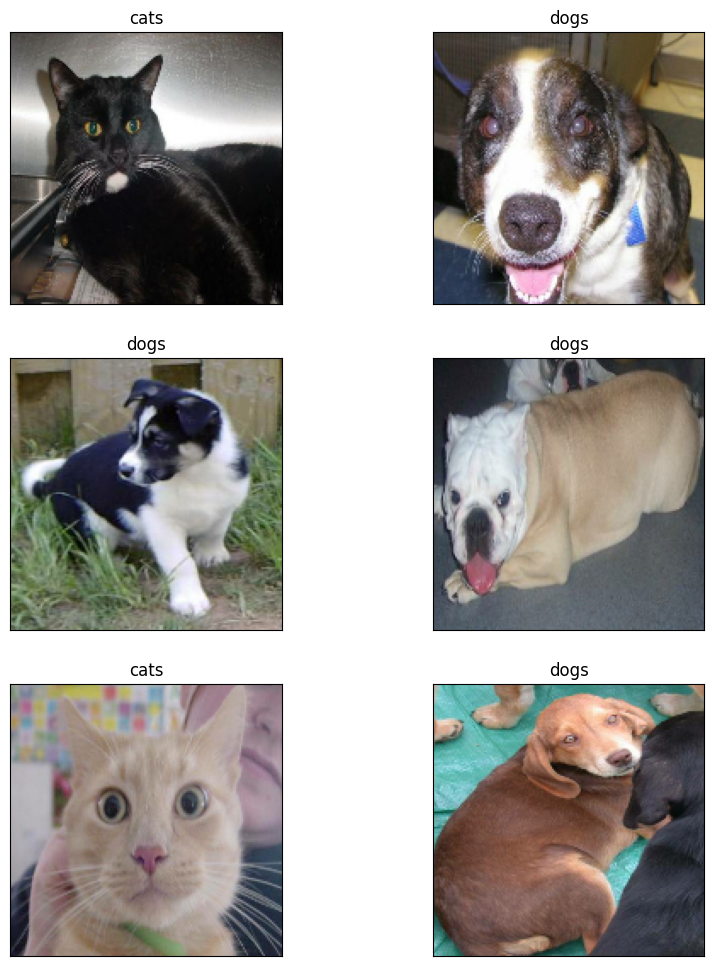

In [22]:
for (images,labels) in train_dataset.take(1):
  plt.figure(figsize=(10,12))
  for i in range(6):
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

